### CS4423 - Networks
Angela Carnevale  
School of Mathematical and Statistical Sciences  
University of Galway

# Assignment 1

Please provide answers to the problems in the boxes provided. 

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
* `Code` boxes take (and execute) `python` code.
* `Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, print this notebook into a **PDF** file and submit this to
**Canvas**.

**Deadline** is Friday 9 February at 5pm.

## Setup

This is a `jupyter` notebook.   You can open it and interact with it
on [![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/angelacarnevale/2324-CS4423-Networks/HEAD)

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

* In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

* To write text in a Markdown cell, simply double-click on it. When you are done, press SHIFT-RETURN.

In [143]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

##  1. Warmup.

The purpose of this task is to get you used to working with the `networkx` package
in the `jupyter` notebook environment.

1. Define a new (simple) graph `G` on the vertex set $X = \{0, 1, 2, 3, 4, 5, 6, 7\}$
with edges $0-1$, $0-2$, $1-2$, $1-3$, $2-3$, $2-4$, $3-4$, $3-5$, $4-5$, $4-6$, $5-6$, $5-7$, $6-7$, $6-0$, $7-0$ and $7-1$.
Draw the graph.  Hence or otherwise determine its **order** (the number of nodes)
and its **size** (the number of links).

In [144]:
## Define G

G = nx.Graph(["01", "02", "12", "13", "23", "24",
               "34", "35", "45", "46", "56", "57",
                 "67", "60", "70", "71"])

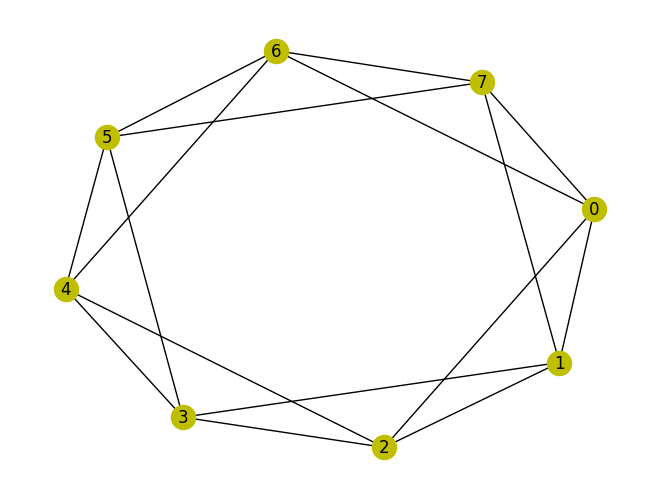

In [145]:
## Draw G

nx.draw(G, with_labels=True, node_color='y')

In [146]:
## Determine the order of G

print("Order of G:", G.order())

Order of G: 8


### Comments:

The order of the graph $G$ is 8 because ther order indicates the bumber of nodes in the graph.

2. Find the **adjacency matrix** $A$ of the graph `G`.  Then compute its square, $A^2$. What do the entries of $A^2$ tell us about the graph $G$?

In [147]:
## Find adjacency matrix of G

A = nx.adjacency_matrix(G).toarray()

print("Adjacency matrix of G:", A)

Adjacency matrix of G: [[0 1 1 0 0 0 1 1]
 [1 0 1 1 0 0 0 1]
 [1 1 0 1 1 0 0 0]
 [0 1 1 0 1 1 0 0]
 [0 0 1 1 0 1 1 0]
 [0 0 0 1 1 0 1 1]
 [1 0 0 0 1 1 0 1]
 [1 1 0 0 0 1 1 0]]


In [148]:
## get A^2

AA = A @ A

print("A^2:", AA)

A^2: [[4 2 1 2 2 2 1 2]
 [2 4 2 1 2 2 2 1]
 [1 2 4 2 1 2 2 2]
 [2 1 2 4 2 1 2 2]
 [2 2 1 2 4 2 1 2]
 [2 2 2 1 2 4 2 1]
 [1 2 2 2 1 2 4 2]
 [2 1 2 2 2 1 2 4]]


### What do the entries of $A^2$ tell us about the graph $G$?

Firstly, an adjacency matrix is a matrix where each row and column correponds to vertices of the graph, and each element in the matrix indicates whether there is an edge connecting the corresponding vertices.

Secondly, the square of an adjacency matrix will indicate the number of paths of length 2 between any two vertices in the graph. 

So, in our squared adjacency matrix $A^2$, the numbers listed beside each of the entries indicate how many paths of length 2 connect the two vertices. For example, 0 and 6 have 1 path of length 2 connecting them. This is also known as an *indirect* connection.

Using any elements on the diagonal of the matrix (e.g., (0,0), (1,1), etc.), we can see how many cycles of length 2 contain this vertex. For example, vertex 0 (4), is present in 4 cycles of length 2.


3. Transform the matrix $A^2$ this into the adjacency matrix of a graph and draw the corresponding graph `G2`.  You should get a complete graph on $8$ vertices. How do you explain this in terms of paths in the graph $G$?

In [149]:
## Transform AA into a graph

## how to remove self loops?

G2 = nx.from_numpy_array(AA.transpose())

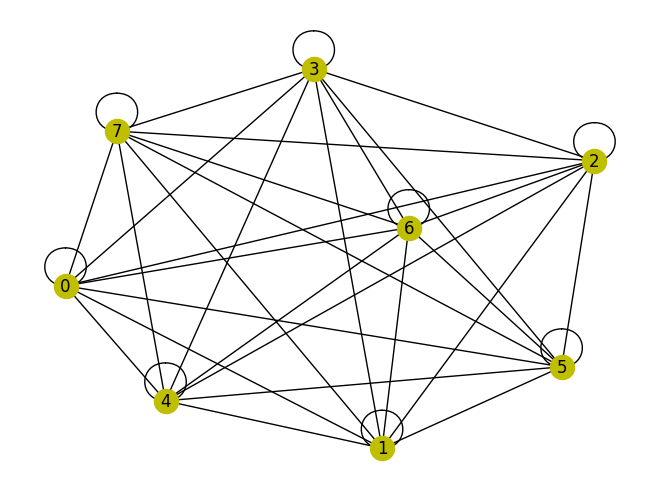

In [150]:
## your code here
nx.draw(G2, **opts)

In [151]:
## your code here

How do you explain this in terms of paths in the graph $G$?

A complete graph is a graph where *every* pair of vertices is connected by an edge.
    i.e., every vertex is directly connected to every other vertex.

Each entry in $A^2$ indicates whether or not there is a path of length 2 between the vertices.
Therefore, each edge in its graph will correspond to a path of length 2 in $G$.

Since the graph of $A^2$ gives us a complete graph on 8 vertices, tell sus that every pair of vertices in $G$ was connected by a path of length 2.

##  2.  Projections

Suppose that $G$ is a bipartite graph on a vertex set that is the disjoint union of two sets $X$ and $Y$, where each edge
connects a vertex in $X$ to a vertex in $Y$.  The **projection** of $G$ onto the set $X$
is the graph with vertex set $X$, where any two elements are joined by an edge whenever
they are joined to a common element $y \in Y$ in the graph $G$.  
The adjacency matrix of the projection can be derived from the square $A^2$ of the adjacency matrix
$A$ of $G$.

Consider the affilliation network below $G$, with $9$ people labelled $a$ to $h$,
and five foci ("focal points" of interaction) labelled $1$ to $5$: 

![bipartite graph](https://angelacarnevale.github.io/bipartite.png)

1.  Compute the adjacency matrix of $G$.

2. Draw the projection on (just)
   the people, in which two people are joined by an edge if they have a common
   focus.
   (Of course, one can do this easily by hand.  It would be nice to get
   `networkx` to do it for you.)

3. Compute the adjacency matrix $B$ of the projection
   and compare it to $A^2$ (note that the two matrices have different sizes).  What do you observe?

Adjacency matrix of G:
 [[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0]]

-------------------

A^2:
 [[4 0 0 0 0 0 0 3 0 0 1 0 2]
 [0 2 1 2 2 0 1 0 1 1 0 0 0]
 [0 1 2 1 2 0 0 0 0 1 0 0 0]
 [0 2 1 2 2 0 1 0 1 1 0 0 0]
 [0 2 2 2 4 0 1 0 1 2 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 1 0 2 0 1 1 0 0 0]
 [3 0 0 0 0 1 0 6 0 0 1 0 2]
 [0 1 0 1 1 0 1 0 1 1 0 0 0]
 [0 1 1 1 2 0 1 0 1 2 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 2 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 2 0 0 1 0 3]]


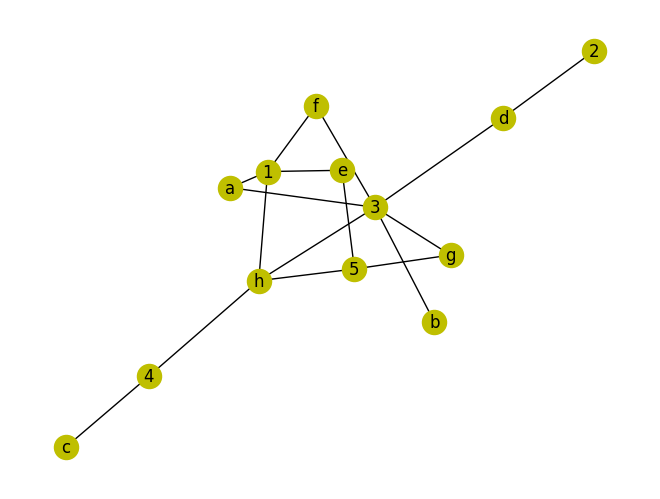

In [152]:
## Create G:

G = nx.Graph(["1a", "1e", "1f", "1h", "2d", "3a",
               "3b", "3d", "3f", "3g", "3h", "4c",
                 "4h", "5e", "5g", "5h"])
nx.draw(G, **opts)

## Copmute the adjacency matrix of G

A = nx.adjacency_matrix(G).toarray()

print("Adjacency matrix of G:\n", A)


print("\n-------------------\n")

## Compute A^2

AA = A @ A
print("A^2:\n", AA)



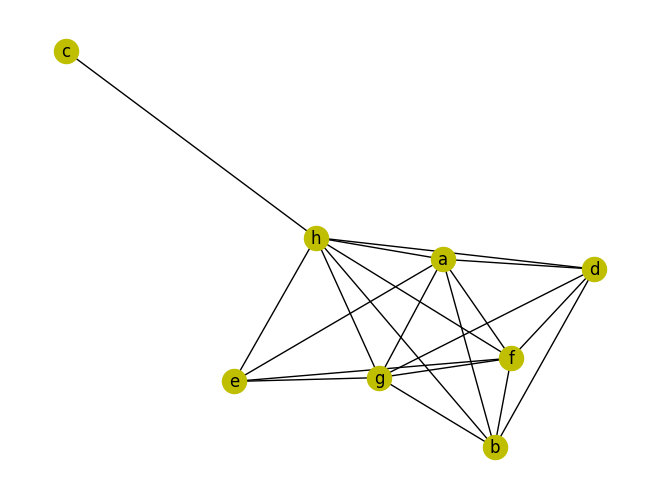

In [153]:
## Draw projection on a, b, c, d, e, f, g, h

G_proj = nx.projected_graph(G, ["a", "b", "c", "d", "e", "f", "g", "h"])

nx.draw(G_proj, **opts)


In [154]:
## Copmute the adjacency matrix of G_proj

B = nx.adjacency_matrix(G_proj).toarray()

print("Adjacency matrix of G_proj:\n", B)
print("\n-------------------\n")
print("A^2:\n", AA)


Adjacency matrix of G_proj:
 [[0 1 0 1 1 1 1 1]
 [1 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 1]
 [1 1 0 0 0 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1]
 [1 1 1 1 1 1 1 0]]

-------------------

A^2:
 [[4 0 0 0 0 0 0 3 0 0 1 0 2]
 [0 2 1 2 2 0 1 0 1 1 0 0 0]
 [0 1 2 1 2 0 0 0 0 1 0 0 0]
 [0 2 1 2 2 0 1 0 1 1 0 0 0]
 [0 2 2 2 4 0 1 0 1 2 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 1 0 2 0 1 1 0 0 0]
 [3 0 0 0 0 1 0 6 0 0 1 0 2]
 [0 1 0 1 1 0 1 0 1 1 0 0 0]
 [0 1 1 1 2 0 1 0 1 2 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 2 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 2 0 0 1 0 3]]


### What do you observe when comparing $B$ to $A^2$

The adjacency matrix of $B$ is smaller than $A^2$ because we have simplified the graph by focusing only on the connections between people.

In $B$, each 0 means that there is no edge directly connecting the two vertices in $G_proj$, and a 1 means that there is. In $A^2$ each element in the matrix tells us how many paths of length 2 there are between the pair of nodes in $G$.

If we compare $B$ and $A^2$ we can see whether or not simplifying the graph has maintained valuable information about connections.


## 3. Random Trees

The `nx.random_tree(n)` command can be used to generate a random tree on the `n` vertices
represented in `python` by `range(n)` (in order).

Such a tree can be converted into a sequence of $n - 2$ numbers, its **Prüfer code** by the
`python` function `pruefer_code`, defined as follows:

In [155]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

def pruefer_code(T):
    tree = T.copy()
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

In [156]:
T = nx.random_tree(12)

In [157]:
code = pruefer_code(T)
code

[4, 3, 2, 6, 7, 1, 5, 4, 5, 10]

Conversely, the following function `tree_pruefer` constructs a tree from a
Prüfer code.

In [158]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    degrees = [1 for x in tree]
    for y in code:
        degrees[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if degrees[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    degrees[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if degrees[x] == 1]
    tree.add_edge(*e)
    
    return tree

In [159]:
T2 = tree_pruefer(code)

Use, if needed, the above functions to experiment with random trees and/or sequences and answer the following:

1. Which **labelled** tree on $n$ nodes $\{0,1,\dots,n-1\}$ corresponds to the Prüfer code $[0,1,2,\dots,n-3]$? (Note: you need to describe and justify mathematically an answer for all $n$.)

[3 2]


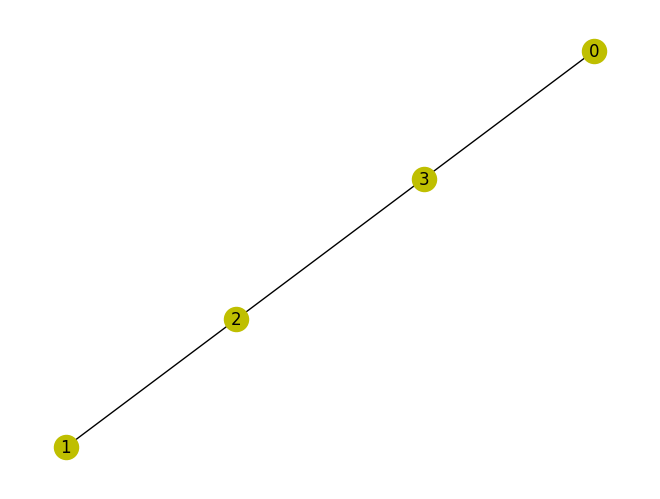

In [160]:
### Start with a graph with vertex set X = {0,1,2,...,n-3}

import numpy as np
n = 5



def random_tree(n):
    code = np.random.randint(n, size=n-3)
    print(code)
    return tree_pruefer(code)

T = random_tree(n)

nx.draw(T, **opts)


For n=5, the prufer sequence is [0,1].

Therefore, the length of the tree will be 4. 

The nodes for the tree are: 0, 1, 2, 3.

Their degrees: 
node 0 = degree 2, node 1 = degree 2, node 2 = degree 1, node 3 = degree 1.

So, the algorithm will start with 0. This will be connected to the lowest node with degree 1, which is 2.

Current Tree: 0-2

Next we decrement degree0 to 1, and degree2 to 0

Next we go to 1, and connect it to the lowest node with degree 1, which is now 0.

Current Tree: 1-0-2

Again, we decrement the degrees so degree1 is 1, degree0 is 0.

Now there are only 2 left that are not degree0. So, we connect 3 to 1 and finish the tree.

3-1-0-2.

As you can see, the degree of the nodes indicated by the prufer sequence is true in the tree. 3 and 2 have degree 1 and are the leaf nodes.
This then means that any prufer sequence will give a corresponding tree of size n-1, if the prufer code is n-3 length

2. More generally, what can one say about a tree $T$ whose Prüfer code consists of $n-2$ **distinct** entries? (Note: you need to describe and justify mathematically an answer for all $n$.)

Answer:
    If a Prufer code consists of $n-2$ entries, it implies that every vertex except the last two appears in the Prufer code. 

3. Which **labelled** tree on $n$ nodes $\{0,1,\dots,n-1\}$ corresponds to a Prüfer code which has $n-2$ identical entries? (Note: you need to describe and justify mathematically an answer for all $n$.)

[1 3 0]


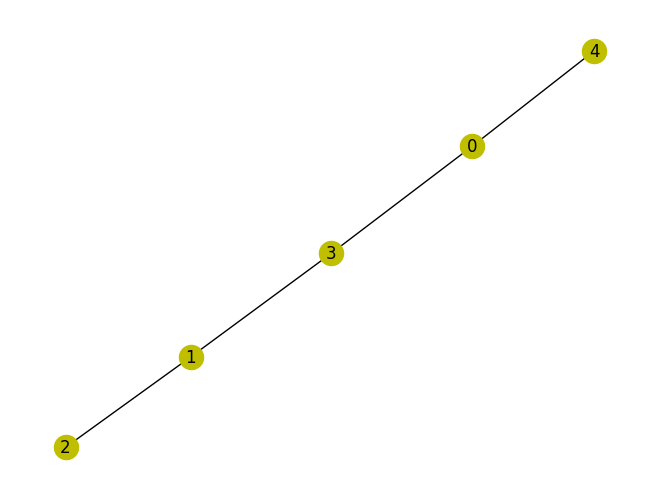

In [161]:
### Start with a graph with vertex set X = {0,1,2,...,n-2}

import numpy as np
n = 5

def random_tree(n):
    code = np.random.randint(n, size=n-2)
    print(code)
    return tree_pruefer(code)

T = random_tree(n)

nx.draw(T, **opts)

# note tutor said you dont have to prove it mathematically, but justify it well



For n=5, the prufer sequence is [4,2,3].

Therefore, the length of the tree will be 5. 

The nodes for the tree are: 4,2,3,0,1.

Their degrees: 
node 4 = degree 2, node 2 = degree 2, node 3 = degree 2, node 0 = degree 1, node 1 = degree 1.

So, the algorithm will start with 4 (the first entry in the sequence). This will be connected to the lowest node with degree 1, which is 0.

Current Tree: 4-0

Next we decrement degree4 to 1, and degree0 to 0

Next we go to 2, and connect it to the lowest node with degree 1, which is now 1.

Current Tree: 4-0 2-1

Again, we decrement the degrees so degree2 is 1, degree1 is 0.

Next, we go to 3, and connect it to the lowest that is degree = 1 which is 3.

So tree is: 3-4-0 2-1.

Now there are only 2 left that are not degree0. So, we connect 2 to 3 and finish the tree.

1-2-3-4-0

As you can see, the degree of the nodes indicated by the prufer sequence is true in the tree. 2,3,4 have degree 2 and they are in the sequence.
This then means that any prufer sequence will give a corresponding tree of size n-1, if the prufer code is n-3 length